In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Load the MNIST dataset
dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

In [ ]:
# Explore the data shapes and ensure it's correctly formatted
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)


In [ ]:
# Normalize the pixel values to improve the model performance
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the CNN acrhitecture to using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:

# Define LearningRateScheduler callback to find the optimal learning rate
init_lr = 7.9433e-04
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: init_lr * 10**(epoch / 20)
)

In [ ]:
# Compile and train the model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = model.fit(train_images, train_labels, epochs=epochs, callbacks=[lr_schedule])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8829 - loss: 0.3296 - learning_rate: 7.9433e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.8852 - loss: 0.3214 - learning_rate: 8.9125e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.8894 - loss: 0.3085 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8909 - loss: 0.3033 - learning_rate: 0.0011
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.8937 - loss: 0.2945 - learning_rate: 0.0013
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.8961 - loss: 0.2867 - learning_rate: 0.0014
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.8989 - loss: 0.2806 - learning_rate: 0.0016
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9007 - loss: 0.2741 - learning_rate: 0.0018
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9010 - los

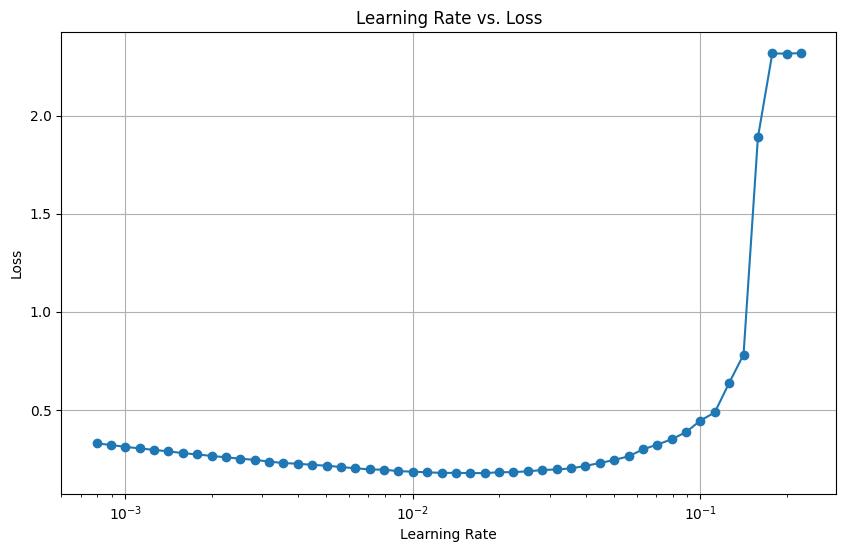

In [ ]:
# Visualize the loss function and learning rate values to find the optimal lr
def plot_lr_vs_loss(initial_lr, scheduler, factor, epochs, loss_history):
    """
    Plots learning rate vs. loss.

    Parameters:
    - initial_lr: The initial learning rate.
    - factor: The multiplication factor for each epoch.
    - epochs: Total number of epochs.
    - loss_history: List of loss values.
    """
    lrs = [scheduler(epoch, initial_lr) for epoch in range(epochs)]

    plt.figure(figsize=(10, 6))
    plt.plot(lrs, loss_history, marker='o')
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.title('Learning Rate vs. Loss')
    plt.grid(True)
    plt.show()

# Extract loss history
loss_history = history.history['loss']
epochs = 50
# Plot learning rate vs. loss
plot_lr_vs_loss(initial_lr=init_lr, scheduler=lambda epoch, lr: init_lr * 10**(epoch / 20), factor=1.2, epochs=epochs, loss_history=loss_history)


In [ ]:
# Convert loss_history to a NumPy array for easier manipulation
loss_array = np.array(loss_history)

# Find the index of the minimum loss
min_loss_index = np.argmin(loss_array)

# Retrieve the minimum loss value
min_loss = loss_array[min_loss_index]

# Print the results
print(f"Minimum Loss: {min_loss} at Epoch: {min_loss_index + 1}")

Minimum Loss: 0.1772347241640091 at Epoch: 28


In [ ]:
# Define the scheduler function used during training
scheduler_func = lambda epoch, lr: init_lr * 10**(epoch / 20)

# Calculate the learning rate at the epoch with minimum loss
optimal_lr = scheduler_func(min_loss_index, init_lr)

print(f"Optimal Learning Rate: {optimal_lr}")

Optimal Learning Rate: 0.017782833619989894


In [11]:
# Apply the optimal learning rate and retrain the model with 20 epoch.
optimizer = tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.0251)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/20
 114/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.1032 - loss: 2.3040

KeyboardInterrupt: 